# Move Dialogue: Base Task

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import math
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Dataset

Source for how to import data:  
https://www.kaggle.com/shashankasubrahmanya/preprocessing-cornell-movie-dialogue-corpus

In [2]:
movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]


In [3]:
movie_lines = pd.read_csv("data/movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", encoding='ISO-8859-1', index_col = False, names = movie_lines_features)


In [4]:
movie_titles_features = ["ID", "Title", "Year", "Rating", "No. of Votes", "Genre"]


In [5]:
movie_titles = pd.read_csv("data/movie_titles_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", encoding='ISO-8859-1', index_col = False, names = movie_titles_features)


In [6]:
movie_titles.head()

,ID,Title,Year,Rating,No. of Votes,Genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thril..."


## Data Cleaning

In [7]:
movie_lines = movie_lines.sample(frac=0.01)

In [8]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
291285,L629539,u8657,m587,COLE,Underground.
158816,L140646,u4587,m302,VINCENT,How are you at math? I was hired for five hi...
211526,L339190,u6249,m417,TAKSTER RINPOCHE,Don't eat all those sweets. You'll get sick.
123608,L28266,u3606,m238,MARGO,"She'd be a great help - read scripts, intervi..."
303778,L664721,u9000,m613,XANDER,"You're not exactly ""going anywhere"" yourself."


In [9]:
# Strip the space from "LineID" for further usage and change the datatype of "Line"
movie_lines["LineID"] = movie_lines["LineID"].apply(str.strip)
movie_lines["Movie"] = movie_lines["Movie"].apply(str.strip)
movie_lines["Line"] = movie_lines["Line"].apply(str)
movie_lines["Line"] = movie_lines["Line"].apply(str.lower)

In [10]:
def parse_year(year_str):
    new = str.strip(year_str)
    new = year_str[:5]
    return int(new)

In [11]:
movie_titles["ID"] = movie_titles["ID"].apply(str.strip)
movie_titles["Year"] = movie_titles["Year"].apply(parse_year)

In [12]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
291285,L629539,u8657,m587,COLE,underground.
158816,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...
211526,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.
123608,L28266,u3606,m238,MARGO,"she'd be a great help - read scripts, intervi..."
303778,L664721,u9000,m613,XANDER,"you're not exactly ""going anywhere"" yourself."


In [13]:
# # Remove lines that do not contain he or she pronouns
# # Only include lines where ' he ' is in middle of sentence, surrounded by at least 1 space on either side
# movie_lines = movie_lines[movie_lines["Line"].str.contains('|'.join([' he ', ' she ']))]

In [14]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
291285,L629539,u8657,m587,COLE,underground.
158816,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...
211526,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.
123608,L28266,u3606,m238,MARGO,"she'd be a great help - read scripts, intervi..."
303778,L664721,u9000,m613,XANDER,"you're not exactly ""going anywhere"" yourself."


### Tokenization and Segmentation

In [15]:
# Tokenize and segment
# Drop rows without pronouns

In [16]:
movie_lines["Segmented_Line"] = movie_lines["Line"].apply(sent_tokenize)

In [17]:
df = pd.DataFrame(columns=movie_lines.columns)

In [18]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line


In [19]:
for row in movie_lines.iterrows():
    for sentence in row[1]["Segmented_Line"]:
        line_id = row[1]["LineID"]
        character = row[1]["Character"]
        movie = row[1]["Movie"]
        name = row[1]["Name"]
        line = row[1]["Line"]
        segmented = sentence
        new_row = {"LineID":line_id, "Character": character,
                   "Movie":movie,"Name":name,"Line":line,
                   "Segmented_Line":segmented}
        df = df.append(new_row, ignore_index=True)

In [20]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L629539,u8657,m587,COLE,underground.,underground.
1,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,how are you at math?
2,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i was hired for five hits.
3,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i did four.
4,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.,don't eat all those sweets.


In [21]:
movie_lines = df

In [22]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L629539,u8657,m587,COLE,underground.,underground.
1,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,how are you at math?
2,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i was hired for five hits.
3,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i did four.
4,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.,don't eat all those sweets.


In [23]:
movie_lines["Tokenized_Line"] = movie_lines["Segmented_Line"].apply(word_tokenize)


In [24]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line
0,L629539,u8657,m587,COLE,underground.,underground.,"[underground, .]"
1,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,how are you at math?,"[how, are, you, at, math, ?]"
2,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i was hired for five hits.,"[i, was, hired, for, five, hits, .]"
3,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i did four.,"[i, did, four, .]"
4,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.,don't eat all those sweets.,"[do, n't, eat, all, those, sweets, .]"


### Extracting Pronouns

In [25]:
def get_pronoun(tokenized_line):
    if "she" in tokenized_line:
        return "she"
    elif "he" in tokenized_line:
        return "he"
    else:
        return "none"

In [26]:
movie_lines["Pronoun"] = movie_lines["Tokenized_Line"].apply(get_pronoun)

In [27]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
0,L629539,u8657,m587,COLE,underground.,underground.,"[underground, .]",none
1,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,how are you at math?,"[how, are, you, at, math, ?]",none
2,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i was hired for five hits.,"[i, was, hired, for, five, hits, .]",none
3,L140646,u4587,m302,VINCENT,how are you at math? i was hired for five hi...,i did four.,"[i, did, four, .]",none
4,L339190,u6249,m417,TAKSTER RINPOCHE,don't eat all those sweets. you'll get sick.,don't eat all those sweets.,"[do, n't, eat, all, those, sweets, .]",none


In [28]:
movie_lines = movie_lines.loc[movie_lines["Pronoun"] != "none"]

In [29]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
6,L28266,u3606,m238,MARGO,"she'd be a great help - read scripts, intervi...","she'd be a great help - read scripts, intervi...","[she, 'd, be, a, great, help, -, read, scripts...",she
19,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,what didn't she do.,"[what, did, n't, she, do, .]",she
20,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,"she fucked the living shit outta me, that's wh...","[she, fucked, the, living, shit, outta, me, ,,...",she
64,L276276,u5820,m385,TREVOR,"we startred off to be. she was, i guess i was...","she was, i guess i was.","[she, was, ,, i, guess, i, was, .]",she
93,L224364,u5400,m358,SATCH,she makes ten.,she makes ten.,"[she, makes, ten, .]",she


In [30]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
count,363,363,363,363,363,363,363,363
unique,283,267,208,245,283,362,362,2
top,L655359,u8914,m606,RAY,"she looked shaky, but lucid. i thought, i wo...",she's much better than wine!,"[she, 's, much, better, than, wine, !]",he
freq,6,6,8,13,6,2,2,244


In [31]:
movie_lines.shape

(363, 8)

### Extracting Verb

In [32]:
def get_verb(tokenized_line):
    pronoun = get_pronoun(tokenized_line)
    pronoun_index = tokenized_line.index(pronoun)
    word_pos_pairs = nltk.pos_tag(tokenized_line[pronoun_index:], tagset='universal')
    pos_list = [pos for _, pos in word_pos_pairs]
    
    if 'VERB' not in pos_list:
        return 'none'
    
    verb_index = pos_list.index('VERB')
    # TODO: consider second verb after pronoun
    # ex: he's biking, 's and biking are both VERB
    return word_pos_pairs[verb_index][0]

In [33]:
movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_71372/3157400569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)


In [34]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
6,L28266,u3606,m238,MARGO,"she'd be a great help - read scripts, intervi...","she'd be a great help - read scripts, intervi...","[she, 'd, be, a, great, help, -, read, scripts...",she,'d
19,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,what didn't she do.,"[what, did, n't, she, do, .]",she,do
20,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,"she fucked the living shit outta me, that's wh...","[she, fucked, the, living, shit, outta, me, ,,...",she,fucked
64,L276276,u5820,m385,TREVOR,"we startred off to be. she was, i guess i was...","she was, i guess i was.","[she, was, ,, i, guess, i, was, .]",she,was
93,L224364,u5400,m358,SATCH,she makes ten.,she makes ten.,"[she, makes, ten, .]",she,makes


In [35]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
count,363,363,363,363,363,363,363,363,363
unique,283,267,208,245,283,362,362,2,112
top,L655359,u8914,m606,RAY,"she looked shaky, but lucid. i thought, i wo...",she's much better than wine!,"[she, 's, much, better, than, wine, !]",he,'s
freq,6,6,8,13,6,2,2,244,90


### Lemmatization

In [36]:
def get_lemmatized_word(word):
    return lemmatizer.lemmatize(word, "v")

In [37]:
# LEMMATIZATION

lemmatizer = WordNetLemmatizer()

movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_71372/3122231019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)


## Extracting Year

In [38]:
def get_movie_year(movie_id):
    return movie_titles.loc[movie_titles["ID"] == movie_id].iloc[0]["Year"]

In [39]:
movie_lines["Year"] = movie_lines["Movie"].apply(get_movie_year)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_71372/2345444802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Year"] = movie_lines["Movie"].apply(get_movie_year)


In [40]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb,Year
6,L28266,u3606,m238,MARGO,"she'd be a great help - read scripts, intervi...","she'd be a great help - read scripts, intervi...","[she, 'd, be, a, great, help, -, read, scripts...",she,'d,1950
19,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,what didn't she do.,"[what, did, n't, she, do, .]",she,do,1986
20,L445801,u7080,m474,ELIAS,what didn't she do. she fucked the living shi...,"she fucked the living shit outta me, that's wh...","[she, fucked, the, living, shit, outta, me, ,,...",she,fuck,1986
64,L276276,u5820,m385,TREVOR,"we startred off to be. she was, i guess i was...","she was, i guess i was.","[she, was, ,, i, guess, i, was, .]",she,be,2002
93,L224364,u5400,m358,SATCH,she makes ten.,she makes ten.,"[she, makes, ten, .]",she,make,2000


In [41]:
movie_lines["Year"].describe()

count     363.000000
mean     1987.482094
std        18.320401
min      1931.000000
25%      1984.000000
50%      1995.000000
75%      1999.000000
max      2009.000000
Name: Year, dtype: float64

## Extracting Genre

In [42]:
def get_genre(movie_id):
    genre_str = movie_titles.loc[movie_titles["ID"] == movie_id].iloc[0]["Genre"]
    return genre_str.strip().replace("'", "").strip('[]').split(", ")

In [43]:
movie_lines["Genre"] = movie_lines["Movie"].apply(get_genre)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_71372/129713391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Genre"] = movie_lines["Movie"].apply(get_genre)


In [44]:
movie_lines["Genre"].describe() 

count         363
unique        124
top       [drama]
freq           18
Name: Genre, dtype: object

# DECADE ANALYSIS

## Counts

In [45]:
def get_df(decade):
    df = movie_lines.loc[movie_lines["Year"] > decade]
    df = df.loc[df["Year"] < decade + 10]
    return df

In [46]:
def get_counts(df):
    counts = Counter(list(df["Verb"].values))
    hes = df.loc[df["Pronoun"] == "he"]
    num_hes = hes.shape[0]
    shes = df.loc[df["Pronoun"] == "she"]
    num_shes = shes.shape[0]
    he_list = list(hes["Verb"].values)
    she_list = list(shes["Verb"].values)
    he_counts = Counter(he_list)
    she_counts = Counter(she_list)
    return counts, he_counts, she_counts, num_hes, num_shes

In [47]:
# counts, he_counts, she_counts, num_hes, num_shes = get_counts(movie_lines)

#### Laplace Smoothing

In [48]:
def laplace(counts, he_counts, she_counts):
    # Laplace smoothing

    for item in counts:
        he_counts[item] += 1

    for item in counts:
        she_counts[item] += 1
        
    return he_counts, she_counts

In [49]:
# he_counts, she_counts = laplace(counts, he_counts, she_counts)

#### Relative Frequency

In [50]:
def get_freqs(counts, he_counts, she_counts, num_hes, num_shes, num_verbs_plot):
    verbs = list(counts.keys())

    he_freqs = []
    she_freqs = []
    freqs = []
    
    for verb in verbs:
        he_rel_freq = he_counts[verb] / num_hes
        she_rel_freq = she_counts[verb] / num_shes
        he_freqs.append(he_rel_freq / she_rel_freq)
        she_freqs.append(she_rel_freq / he_rel_freq)
        if he_rel_freq > she_rel_freq:
            freq = (he_rel_freq / she_rel_freq) * -1
            freq += 1
            freqs.append(freq)
        else:
            freq = (she_rel_freq / he_rel_freq)
            freq += -1
            freqs.append(freq)

    verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, freqs))}
    he_verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, he_freqs))}
    she_verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, she_freqs))}
    
    he_freqs_counter = Counter(he_verb_freqs)
    she_freqs_counter = Counter(she_verb_freqs)
    
    he_verbs = [verb for (verb, _) in he_freqs_counter.most_common(num_verbs_plot)]
    she_verbs = [verb for (verb, _) in she_freqs_counter.most_common(num_verbs_plot)]
    he_freqs = [verb_freqs[verb] for verb in he_verbs]
    she_freqs = [verb_freqs[verb] for verb in she_verbs]
    
    return he_verbs, she_verbs, he_freqs, she_freqs

In [51]:
# he_verbs, she_verbs, he_freqs, she_freqs = get_freqs(counts, he_counts, she_counts, num_hes, num_shes)

#### Plotting

In [52]:
def plot(he_verbs, she_verbs, he_freqs, she_freqs, num_verbs_plot):
    verbs = he_verbs + she_verbs
    freqs = he_freqs + she_freqs
    
    plt.rcdefaults()
    fig, ax = plt.subplots()

    y_pos = np.arange(len(verbs))
    ax.barh(y_pos, freqs, align="center")
    ax.set_yticks(y_pos, labels=verbs)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Relative Frequency Ratio (He <0; She >0) ')
    graph_title = 'Rel. Freq. Ratio of Verbs Following Pronouns {She, He} for Decade ' + str(decade)
    ax.set_title(graph_title)

    title = str(decade) + ".png"
    plt.savefig(title)

## Decades

In [53]:
movie_lines["Year"].min()

1931

In [54]:
movie_lines["Year"].max()

2009

In [55]:
decades = []
for i in range(1930, 2010, 10):
    decades.append(i)

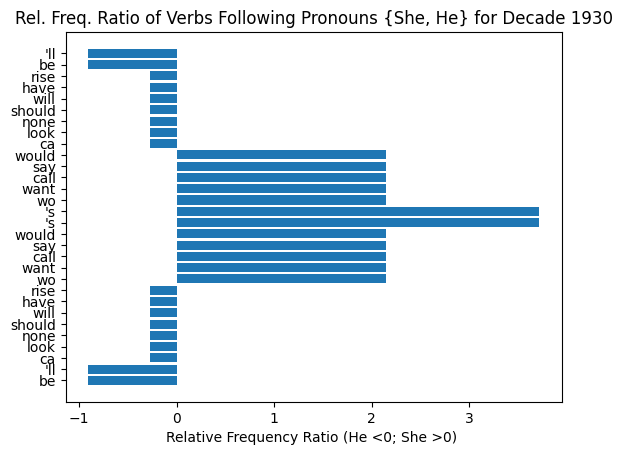

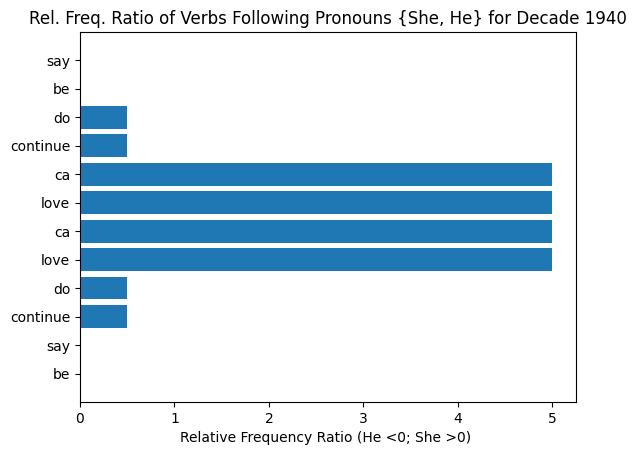

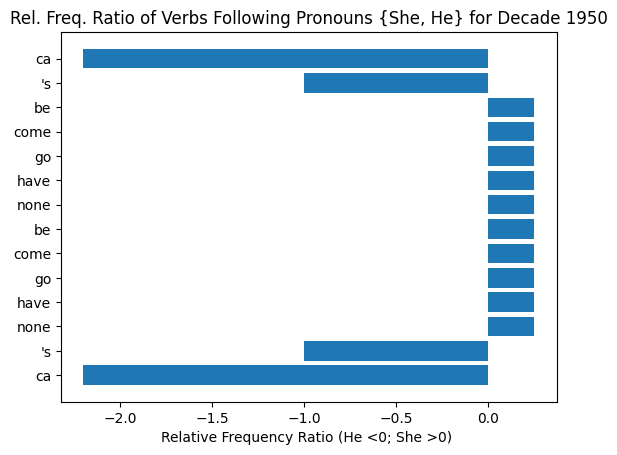

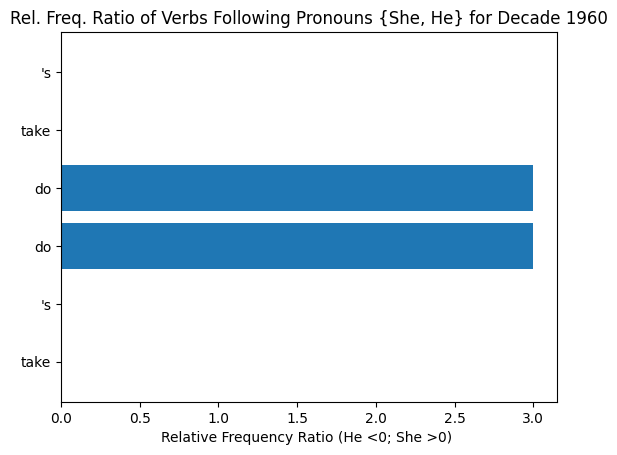

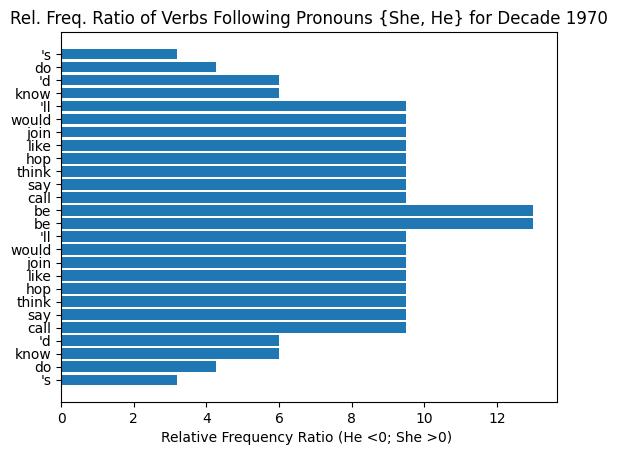

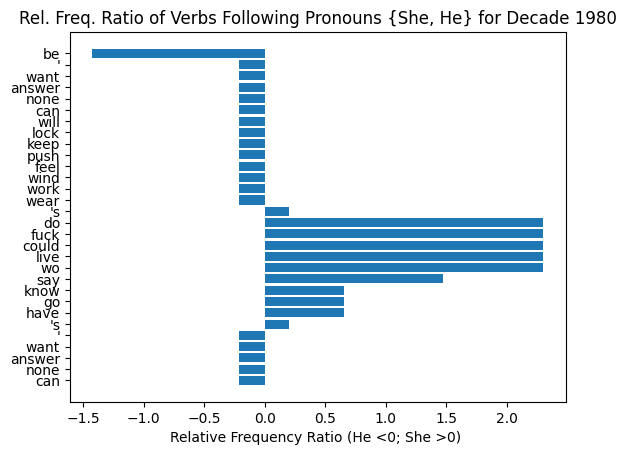

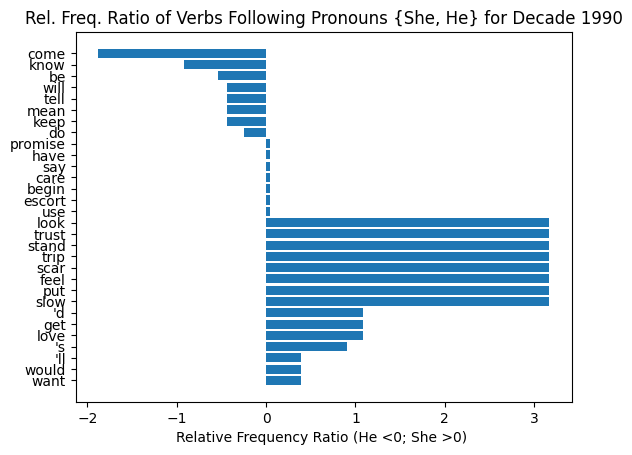

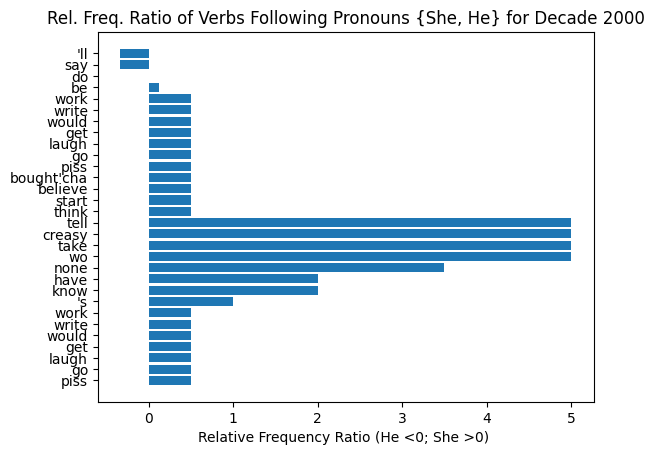

In [56]:
for decade in decades:
    num_verbs_plot = 15
    
    df = get_df(decade)
    
    counts, he_counts, she_counts, num_hes, num_shes = get_counts(df)
    
    he_counts, she_counts = laplace(counts, he_counts, she_counts)
    
    he_verbs, she_verbs, he_freqs, she_freqs = get_freqs(counts, he_counts, she_counts, num_hes, num_shes, num_verbs_plot)
    
    plot(he_verbs, she_verbs, he_freqs, she_freqs, num_verbs_plot)